In [44]:
import nltk
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from string import digits
 # -*- coding: gbk -*-
import sys
from imp import reload
reload(sys)
import os
import os.path
import time
time1=time.time()

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JDH67\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
def MergeTxt(filepath,outfile):
    k = open(filepath+outfile, 'a+')
    for parent, dirnames, filenames in os.walk(filepath):
        for filepath in filenames:
            txtPath = os.path.join(parent, filepath)  # txtpath就是所有文件夹的路径
            f = open(txtPath)
            ##########换行写入##################
            k.write(f.read()+"\n")

    k.close()
    print ("finished")

In [19]:
filepath = "C:/Users/JDH67/Desktop/IFN645/assignment2/text-files-to-mine/"
outfile = "result.txt"
MergeTxt(filepath,outfile)


finished


In [28]:

# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# join provided stopwords with the default NLTK English stopwords
stopwords = set(sw.words('english'))
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [40]:
f = open("text-files-to-mine/result.txt","r")   #设置文件对象
data = f.readlines()  #直接将文件中按行读到list里，效果与方法2一样
rs = 42

In [47]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            remove_digits = str.maketrans('', '', digits)
            token = token.translate(remove_digits)
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')
            

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(data)

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

33995


In [49]:
print(tfidf_vec.get_feature_names())

['aaa', 'aaa champion', 'aaas', 'aaas title', 'aaron', 'aaron persico', 'ab', 'ab de', 'ab devilliers', 'abandon', 'abandon ground', 'abandon logistical', 'abandon match', 'abandon sunday', 'abandonment', 'abandonment real', 'abate', 'abate markos', 'abdominal', 'abdominal injury', 'abdul', 'abdul razzaq', 'ability', 'ability come', 'ability control', 'ability determination', 'ability run', 'ability say', 'ability slow', 'ability undoubted', 'abiyote', 'abiyote abate', 'able', 'able acclimatise', 'able advance', 'able anything', 'able come', 'able cope', 'able get', 'able part', 'able pinch', 'able play', 'able react', 'able return', 'able running', 'able shut', 'able slot', 'able start', 'able vote', 'able welcome', 'abramovich', 'abramovich 拢m', 'abrasive', 'abrasive strokeplay', 'abroad', 'abroad trial', 'absence', 'absence end', 'absence fast', 'absence gb', 'absence green', 'absence huge', 'absence myskina', 'absence paula', 'absence say', 'absent', 'absent capriati', 'absent wta'

In [50]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=7, random_state=rs).fit(X)

In [51]:
# function to visualise text cluster. Useful for the assignment too :)

def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: shock newcastle, wenger shock, newcastle dip, dip, shock, 
Top terms for cluster 1: say, england, year, win, game, 
Top terms for cluster 2: williams u, williams, u, venus williams, venus, 
Top terms for cluster 3: maurice lindsay, farrell possible, captain andy, saga captain, switch rugby, 
Top terms for cluster 4: deny report, clijsters deny, persistent wrist, open persistent, january australian, 
Top terms for cluster 5: cole, robben cole, robben, chelsea win, earn chelsea, 
Top terms for cluster 6: g, k pietersen, collingwood, trescothick wharf, g batty, 


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(data)
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(data)

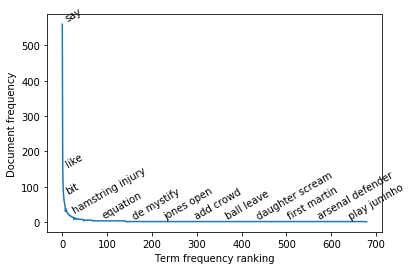

In [55]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
visualise_zipf(terms)

In [57]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.8)
X_filter = filter_vec.fit_transform(data)

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

33897


In [58]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=7, random_state=rs).fit(X_filter)

Wall time: 3.93 s


In [59]:
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec.get_feature_names())


Top terms for cluster 0: shock newcastle, newcastle dip, wenger shock, dip, shock, 
Top terms for cluster 1: say, england, year, win, game, 
Top terms for cluster 2: williams u, williams, u, venus williams, venus, 
Top terms for cluster 3: captain andy, chairman maurice, possible switch, solution go, farrell possible, 
Top terms for cluster 4: open persistent, clijsters deny, report pull, january australian, deny report, 
Top terms for cluster 5: cole, robben cole, robben, cole earn, chelsea win, 
Top terms for cluster 6: g, v solanki, giles gough, jones wkt, j anderson, 


In [61]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)

In [62]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = filter_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")
    print()

Top terms in component #0 say, year, win, england, play, 
Top terms in component #1 england, south, africa, south africa, ireland, 
Top terms in component #2 roddick, england, moya, nadal, spain, 
Top terms in component #3 open, england, australian open, australian, win, 
Top terms in component #4 england, cup, ireland, moya, spain, 
Top terms in component #5 moya, cup, spain, davis cup, davis, 
Top terms in component #6 world, roddick, england, nadal, cross country, 
Top terms in component #7 shane, wkt, capt, pakistan, younis, 
Top terms in component #8 day, test, australia, pakistan, south, 
Top terms in component #9 jacques, kallis, villiers, de villiers, de, 


In [63]:
%%time
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=7, random_state=rs).fit(X_trans)

Wall time: 823 ms


In [64]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, filter_vec.get_feature_names())

Top terms for cluster 0: say, england, game, year, go, 
Top terms for cluster 1: cole, g, russia, j, strauss, 
Top terms for cluster 2: open, australian, australian open, win, final, 
Top terms for cluster 3: kafer, saracen, kafer resign, resign, coach, 
Top terms for cluster 4: andrew, jones, thorpe, michael vaughan, graham thorpe, 
Top terms for cluster 5: horan callaghan, miller g, g easterby, sheahan, sheahan horan, 
Top terms for cluster 6: youhana, butt, imran farhat, younis, salman, 
